# Automated Collation

In [106]:
import os
import csv

witnesses = []

files = os.listdir('witnesses')
for f in files:
    if f.endswith('.txt'):
        sigil = f.replace('.txt', '')
        # Construct the full path by joining the directory and filename
        filepath = os.path.join('witnesses', f)
        with open(filepath) as fh:
            thiswitness = {'id': sigil, 'content': fh.read()}
            witnesses.append(thiswitness)

input = {'witnesses': witnesses}
input

{'witnesses': [{'id': 'K',
   'content': 'DE ORDINE AC POSITIONE STELLARUM IN SIGNIS est quidem hic ordo et positio siderum quae fixa caelo plurium coacervatione stellarum insignum aliquod formata vel fabulose variarum genera formarum in caelum recepta creduntur quorum nomina non naturae constitutio sed humana persuasio quae stellis numeros et nomina fecit adinvenit sed quia iuxta aratum numerus stellarum unicuique signo adscriptus est eo quo ab ipso est ordine digesta descriptio proferatur Haelice arcturus maior habet stellas in capite VII in singulis umeris singulas in armo I in pectore I in pede priori claras duas in summa cauda claram unam in ventre claram unam in crure posteriori duas in extremo pede duas in cauda III fiunt XXII Cinosura arcturus minor habet stellas in uno latere IIII claras in quadro positas in cauda claras III fiunt VII sub his apparet sidus quod vocatur polus circum quod putatur totus orbis verti Serpens qui inter arcturos medius iacet habet stellas in capite c

In [107]:
import json

with open('input.json', 'w') as fh:
    json.dump(input, fh, ensure_ascii=False)

In [108]:
!java -jar collatex-tools-1.7.1.jar -f csv -o collation.csv -t input.json

# The *Leitfehler* detection method of Roelli & Bachmann

In [109]:
!pip install pandas==2.0.3

In [110]:
import pandas as pd

df = pd.read_csv('collation.csv', delimiter=',')

df.to_csv('deordine_aligned.csv', sep='\t', index=False)

In [111]:
!echo 'yes' | cpan Algorithm::Diff

Loading internal logger. Log::Log4perl recommended for better logging
Reading '/root/.cpan/Metadata'
  Database was generated on Tue, 31 Dec 2024 06:41:02 GMT
Algorithm::Diff is up to date (1.201).


In [112]:
import os

files = os.listdir('witnesses')
with open('deordine_all.txt', 'w') as fh:
  for f in files:
    if f.endswith('.txt'):
      sigil = f.replace('.txt', '')
      with open("witnesses/%s" % f) as witness:
        line = "%s     %s" % (sigil, witness.read())
        fh.write(line)


In [113]:
!perl lf_new4.pl deordine_all.txt > infile

In [114]:
!apt install phylip

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
phylip is already the newest version (1:3.697+dfsg-2).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


For the next line of code, change Lower-triangular data matrix? to "yes".

In [115]:
!/usr/lib/phylip/bin/fitch


fitch: the file "outfile" that you wanted to
     use as output file already exists.
     Do you want to Replace it, Append to it,
     write to a new File, or Quit?
     (please type R, A, F, or Q) 
r


Fitch-Margoliash method version 3.697

Settings for this run:
  D      Method (F-M, Minimum Evolution)?  Fitch-Margoliash
  U                 Search for best tree?  Yes
  P                                Power?  2.00000
  -      Negative branch lengths allowed?  No
  O                        Outgroup root?  No, use as outgroup species  1
  L         Lower-triangular data matrix?  No
  R         Upper-triangular data matrix?  No
  S                        Subreplicates?  No
  G                Global rearrangements?  No
  J     Randomize input order of species?  No. Use input order
  M           Analyze multiple data sets?  No
  0   Terminal type (IBM PC, ANSI, none)?  ANSI
  1    Print out the data at start of run  No
  2  Print indications of progress of run  Yes
  3                  

In [116]:
!cat outtree

(L:143.87202,(B:135.39232,(T:326.10230,(((C:410.96203,((R:304.86912,
U:300.13088):26.53570,Q:387.38936):52.36692):52.17238,((((M:870.27787,
G:306.72213):178.02020,(A:897.19542,W:460.80458):19.29838):26.59526,
(N:694.25867,S:377.74133):79.33220):34.30743,((V:672.61159,
O:653.38841):167.41006,(H:924.63172,(((E:423.68914,X:302.31086):197.03130,
F:369.36961):506.45164,D:825.68947):395.97233):152.96568):116.17110):64.40688):97.33917,
P:471.43964):116.01031):67.16817):29.09439,K:60.12798);


Input the matrix here: http://www.trex.uqam.ca/index.php?action=newick&project=trex

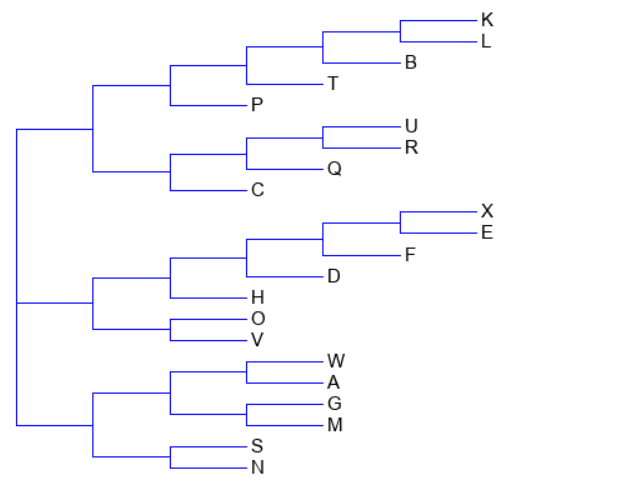

In [117]:
!perl lf_new4.pl deordine_all.txt

22
K         
S          910 
P          741  947 
D          2201  2154  2196 
H          1753  1592  1768  1847 
Q          809  1206  1143  1935  2059 
V          1208  1595  1578  2412  2058  1720 
O          1307  1454  1420  1993  1520  1558  1326 
A          1423  1507  1597  2469  2167  1615  1911  1820 
U          769  1044  1142  1864  1973  710  1630  1641  1459 
L          204  1004  809  2180  1781  873  1143  1385  1513  889 
F          2129  2128  2265  1781  2457  1957  2361  2471  2524  1869  2168 
R          860  916  1107  1782  1812  723  1683  1609  1448  605  987  1739 
W          964  872  1176  2194  1757  1183  1713  1621  1358  901  1053  2160  1026 
X          2325  2179  2400  1796  2480  2116  2520  2526  2655  2017  2356  891  1855  2302 
C          837  1034  1113  1834  1926  907  1676  1599  1403  774  900  1893  770  1043  2044 
G          964  1046  1231  2141  1834  1085  1658  1502  1355  1076  1043  2084  994  972  2185  1000 
B          220  1027 

Enter the matrix here: http://www.trex.uqam.ca/index.php?action=phylip&app=fitch

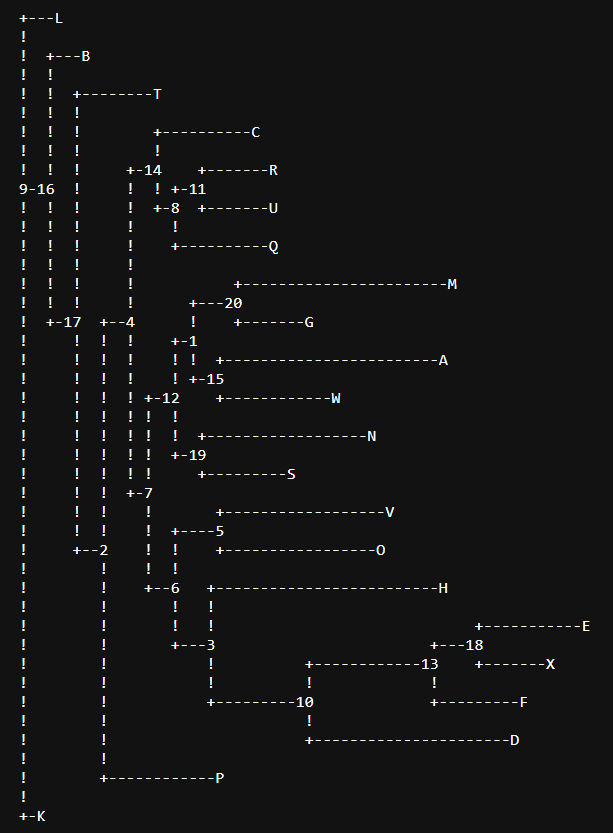

# Making a character matrix

In [118]:
import csv

with open('collation.csv', newline='', encoding='utf-8') as f:
    reader = csv.DictReader(f) # we have added the option here
    print(reader.fieldnames)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X']


In [119]:
with open('collation.csv', newline='', encoding='utf-8') as f:
    reader = csv.DictReader(f, delimiter='\t',quoting=csv.QUOTE_NONE)
    rownum = 1
    for row in reader:
      for k in row.keys():
        if row[k] is None:
          print("Found a None cell on row %d column %s" % (rownum, k))
          print("Whole row is %s" % row.values())
      rownum += 1

print("Column labels are %s" % reader.fieldnames)

Column labels are ['A,B,C,D,E,F,G,H,K,L,M,N,O,P,Q,R,S,T,U,V,W,X']


In [120]:
char_matrix = dict()
locations = 0


In [121]:
with open('collation.csv', encoding='utf-8', newline='') as f:
    reader = csv.DictReader(f, delimiter=',', quoting=csv.QUOTE_NONE)
    for sigil in reader.fieldnames:
        char_matrix[sigil] = ''


    for row in reader:
        unique = set()
        unique.update(row.values())

        if len(unique) < 2 or len(unique) > 8:
            continue

        locations += 1

        characters = dict()
        ctr = 0
        for item in unique:
            characters[item] = chr(65+ctr)
            ctr +=1

        for sigil in row.keys():
            char_matrix[sigil] += characters[row[sigil]]

char_matrix['X']

'BBBBCAAABAAAAAAAAAABAAAABAAAAACAAAAAAAAAAAAAAAAAAAAAAABAAACBAAABABABABDABBBBBABBAACBAABDABBABCBBABBABABBBABACABBCABABBDABCBBBABBBABABBABABBABBBCBBABBABBABAAABBBBABBBBCBCBAABBCBABBAAAABAAAAAAAAAABAAAAABBBBAAABBBAACAAAAAAABAABABABBAAABBCBBCABBBBDCCCBAABABAAABAAACCAABAAAAAAABBABAAABABBABABAABBBAAAAAAAAABABABABBAABCCABCBBBBBABBAABCCBDCCCDCCCDBCCCCBDCAAABABBAABABAABABAABAAAAAAAAAAAAABAAABBBABCDCCECCAAAAAAAAAAAAAAAAAAABBACBABBBABBACCBCBBDCCBAAAAABAACABABABAABABABABABCABACACABACAAAAAAAABBBACAADAADAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBAABABBAAACABBABACCBAAAAACBAAAAAAAABACAAACABACBBAABAAABDCDBCBBBBBBCBBBBBBABAABCBAACAACACBADBBAABCABADAAAAAABBABBACCACBDAACBACBBABCBBABCBBCDBBBABCABBCBBADADCABBBADBAABAAAADABBBABCDAAADABBABABABBAAAACDCEBAAABABAAAAABAAAAAABBBBABACAAACABBBBAABAABBBCBCBBBBBABBAAAAAAABBBCABABAABABBAABBCBAAAABBCABBBCBBBBDCABCAACAABBACCCAABBCBBAABCABAABABABBCCAABBCBBBAABBAABBABCBCBFAABAAAABABABBCBABACCABABBAAAACBBCABBBAAAABAAAAAAABBBCABBBBABBDBAAAABBBBABBBABCCBACABAABADABABBDABBCABABBADCCB

In [122]:
with open('infile', 'w') as f:
    f.write("%d    %d\n" % (len(char_matrix.keys()), locations))
    for sig in char_matrix.keys():
        f.write("%s%s\n" % (sig.replace('.txt', '').ljust(10), char_matrix[sig]))

In [123]:
!apt install phylip

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
phylip is already the newest version (1:3.697+dfsg-2).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [124]:
!/usr/lib/phylip/bin/pars


pars: the file "outfile" that you wanted to
     use as output file already exists.
     Do you want to Replace it, Append to it,
     write to a new File, or Quit?
     (please type R, A, F, or Q) 
r

Discrete character parsimony algorithm, version 3.697

Setting for this run:
  U                 Search for best tree?  Yes
  S                        Search option?  More thorough search
  V              Number of trees to save?  100
  J     Randomize input order of species?  No. Use input order
  O                        Outgroup root?  No, use as outgroup species 1
  T              Use Threshold parsimony?  No, use ordinary parsimony
  W                       Sites weighted?  No
  M           Analyze multiple data sets?  No
  I            Input species interleaved?  Yes
  0   Terminal type (IBM PC, ANSI, none)?  ANSI
  1    Print out the data at start of run  No
  2  Print indications of progress of run  Yes
  3                        Print out tree  Yes
  4          Print out steps 

In [125]:
!cat outtree

((M:405.57,G:68.60):94.22,((P:120.31,(((V:467.36,O:165.73):179.28,H:293.71):116.86,((F:142.80,(X:146.31,E:193.10):92.92):340.05,D:539.90):285.40):144.79):36.59,((W:84.88,(S:73.38,N:160.74):44.90):21.74,((((U:55.16,R:59.68):17.73,Q:144.19):40.33,
C:99.18):32.85,(T:66.33,((L:32.82,K:10.51):6.50,B:42.12):10.55):36.24):23.45):24.84):37.69,A:276.71);


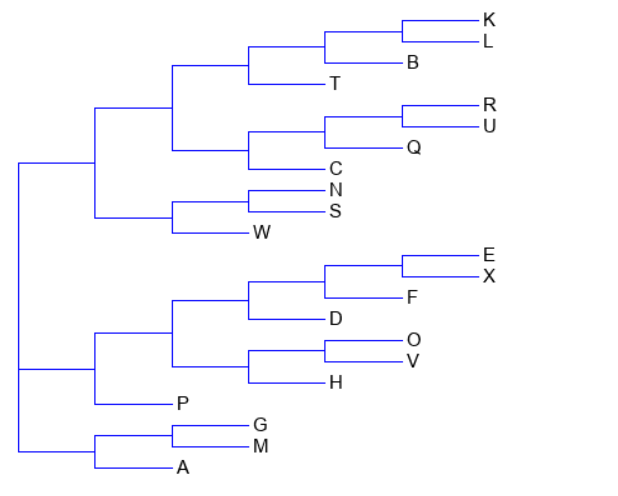

# Weighting variants for parsimony calculation

In [126]:
!echo 'Yes' | perl -MCPAN -e 'install Algorithm::Diff'

Reading '/root/.cpan/Metadata'
  Database was generated on Tue, 31 Dec 2024 06:41:02 GMT
Algorithm::Diff is up to date (1.201).


In [127]:
!apt install phylip

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
phylip is already the newest version (1:3.697+dfsg-2).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [137]:
import csv

textlist = dict()

with open('deordine_aligned.csv', encoding='ISO-8859-15', newline='') as f:
    reader = csv.DictReader(f, delimiter='\t', quoting=csv.QUOTE_NONE)
    for sigil in reader.fieldnames:
        textlist[sigil] = []
    for row in reader:
        # Get the appropriate reading and add it to the appropriate list
        for sigil in reader.fieldnames:
            reading = row[sigil]
            # Check if reading is not None and not an empty string before appending
            if reading is not None and reading != '':
                textlist[sigil].append(reading)

with open('deordine_all.txt', 'w', encoding='utf-8') as f:
    for sigil in textlist.keys():
        # Filter out None values before joining
        line = "%s     %s" % (sigil.replace('.txt', ''), ' '.join([str(x) for x in textlist[sigil] if x is not None]))
        print(line)
        f.write("%s\n" % line)
print("Leitfehler-detection input file generated")

A     est  quidem  hic  ordo  et  positio  siderum  quae  fixa  caelo  plurium  coacervatione  stellarum  insignum  aliquod  formata  vel  fabulose  variarum  genera  formarum  incaelum  recepta  quorum  nomina  non  naturae  constitutio  sed  humana  persuasio  quae  stellis  numeros  et  nomina  adinvenit  sed  quia  iuxta  aratum  numerus  stellarum  unicuique  signo  asscriptus  est  eo  quo  ab  ipso  est  ordine  digesta  descriptio  proferatur  helice  id  est  arcturus  maior  habet  stellas  in  capite  VII  in  singulis  humeris  singulas  in  armo  I  in  pectore  I  in  pede  priori  claras  II  in  summa  cauda  claram  I  in  ventre  claram  I  in  crure  posteri  II  in  extremo  pede  II  in  cauda  III  fiunt  XXII  [C]inosura  id  est  arcturus  minor  habet  stellas  in  uno  latere  positas  in  quadro  claras  IIII  in  cauda  claras  III  fiunt  VII  sub  his  apparet  sydus  quod  vocatur  polus  circum  quod  putatur  totus  orbis  verti  [S]erpens  qui  inter  

In [138]:
!perl lf_new4.pl < deordine_all.txt > matrix

In [131]:
leitfehler = dict()

with open('log', encoding='utf-8') as f:
    for line in f:
        # We want the word (first thing in line) and the percentage (second thing in line)
        parts = line.rstrip().split()
        reading = parts[0]
        weight = int(parts[5].replace('%', '')) / 10
        if reading not in leitfehler:
          leitfehler[reading] = weight
        print("%s, %d" % (reading, weight))
        leitfehler[reading] = weight


Lepos, 10
caelum, 9
arctophylax, 8
SIGNIS, 7
umero, 7
adscriptus, 7
syderum, 6
pinnis, 6
assignantur, 6
due, 6
sinistru, 6
ericthonium, 5
nature, 5
ventro, 5
piscis, 5
heridanus, 5
Cassepia, 5
Boetes, 5
Cenosura, 5
illius, 5
SIGNORUM, 5
tyrso, 5
ceterae, 5
asscriptus, 5
nubecula, 5
baltheo, 5
tirso, 5
cetere, 5
totus, 5
quinque, 5
delton, 5
fabulosae, 5
sagittae, 5
artophylax, 5
notus, 5
ascriptus, 4
thyrso, 4
XIX, 4
erichtonium, 4
ungulis, 4
Cynosura, 4
appellunt, 4
STELLARUM, 4
balteo, 4
appellantur, 4
borei, 4
signum, 4
XXIII, 4
haedi, 3
labiis, 3
positae, 3
chele, 3
priores, 3
potius, 3
stellis, 3
fidis, 3
grece, 3
clarior, 3
invicem, 3
notata, 3
sibi, 3
posterioribus, 3
dicitur, 3
tenentis, 3
Libre, 3
facie, 3
siglis, 3
tenentes, 3
caeterae, 3
XXII, 3
posite, 3
VIIII, 3
hiades, 3
sedet, 3
selle, 3
Andromeda, 3
pennulis, 3
arctophilax, 3
posteriore, 3
aquilonalis, 3
chelae, 3
tauri, 3
foemore, 3
clava, 3
artophilax, 3
binis, 2
geminis, 2
siglas, 2
situs, 2
aedi, 2
una, 2
post, 2
vi

In [139]:
import csv

char_matrix = dict()
locations = 0
weights = '' ## NEW: the set of, one weight per variant location

with open('deordine_aligned.csv', encoding='ISO-8859-15', newline='') as f:
    reader = csv.DictReader(f, delimiter='\t', quoting=csv.QUOTE_NONE)
    for sigil in reader.fieldnames:
        char_matrix[sigil] = ''
    for row in reader:
        unique = set()
        # Filter out None values before calling rstrip()
        unique.update([x.rstrip() for x in row.values() if x is not None])

        if len(unique) < 2 or len(unique) > 8:
            continue

        locations += 1
        maxweight = 0  ## NEW: Keep track of the highest reading weight we find in this location
        characters = dict()
        ctr = 0
        for item in unique:
            characters[item] = chr(65+ctr)
            ctr += 1
            ## NEW: Look to see if there is a weight for this reading and if it is the highest so far
            if item in leitfehler:
                if maxweight < leitfehler[item]:
                    maxweight = leitfehler[item]
        ## NEW: Record the highest weight we found for this location in the 'weights' array
        weight = 'A' if maxweight == 10 else "%d" % maxweight
        weights += weight

        for sigil in row.keys():
            # Handle None values when accessing row[sigil]
            # If row[sigil] is None or empty, add a placeholder character (e.g., '-') to char_matrix
            char_matrix[sigil] += characters.get(row[sigil].rstrip() if row[sigil] is not None else '', '-')

print(char_matrix)
print(weights)

{'A': 'AAAAAAAADBBBCBBBBABBBBABBBCBBBCABABBBBBBAABBBBBAAABBBCBBBCBBBCBAABCABBCBBBBBBBACBCDCABBCBBCBBCBFBAABBBBBBBBACBBBEBABBDEBBCBBBBBBAAABAABBBABBBCAAABABABAACBBBBABBACABBBBBCBABABDABABBBBDABABAACBABABCCCDCBBBABBADACDBBAAACBABBBBBCBBBBBBBAABBBCBBABEACBBBBBBBBDBBBCDCDABBCAABCABABACDAABBCABCBBAAAAABCBBBAABBABABBACBBBABCCAADAAAAABBBBCBCBDBCBCABBBBCBBCCCBBBCEBABBCDADBADBCCCCCCBCBCBACCBBBCBBBBBBBBBBDBDEAAAAAAAAAAAAAAAAAAAABBBBCBBBBBBACDCCDDBBDBBBBACABBAABCABABAACABABAACACDAAAAAAAAAAAAAAAAAACDABABAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBAABCBCDCBCBCCBBACABBAADABAABAABABACAACBABABBACBACBCCDABAAAAAAAAAABBBBBBBBBADDBACAADACBBDBCBCBCCCCDAAAABCBBBACBCCBBBCBBBCBBBDBBCBCBDBBBBCCBBBBDBBBBBBBBCCCBBABBBAAABCBBCBBCBBBBACBBBCBBCBAACBABBBDBCCBBDBBCBBBBABBBCBBBBABBBBBBACABABDAABBACBBDBABCAAAAAABDCCBAAAAAAABCACCDCCBBDCACBABCCABCAEBBCABBBCBBBCDCAADBACBBACBCDCABBBCBCBCBCBBBAABABBBCCCABACBBBBBBBBBBBBBBEDCEABBBBBBBBAAAACCCCBACABBBBABACBCCBBBAABDBBCBBCABABACCEAAAABBABAAAACBBBBBBBBBBBBCBCBABAABBBBBBBBBBBBCBBBB

In [140]:
if len(weights) == locations:
    print("Looking good")
else:
    print("Uh-oh! We have %d variant locations but %d assigned weights." % (locations, len(weights)))

Looking good


In [141]:
with open('infile', 'w') as f:
    f.write("%d    %d\n" % (len(char_matrix.keys()), locations))
    for sig in char_matrix.keys():
        f.write("%s%s\n" % (sig.replace('.txt', '').ljust(10), char_matrix[sig]))

with open('weights', 'w') as f:
    for w in weights:
        f.write(w)
    f.write("\n")

In [142]:
!/usr/lib/phylip/bin/pars


pars: the file "outfile" that you wanted to
     use as output file already exists.
     Do you want to Replace it, Append to it,
     write to a new File, or Quit?
     (please type R, A, F, or Q) 
r

Discrete character parsimony algorithm, version 3.697

Setting for this run:
  U                 Search for best tree?  Yes
  S                        Search option?  More thorough search
  V              Number of trees to save?  100
  J     Randomize input order of species?  No. Use input order
  O                        Outgroup root?  No, use as outgroup species 1
  T              Use Threshold parsimony?  No, use ordinary parsimony
  W                       Sites weighted?  No
  M           Analyze multiple data sets?  No
  I            Input species interleaved?  Yes
  0   Terminal type (IBM PC, ANSI, none)?  ANSI
  1    Print out the data at start of run  No
  2  Print indications of progress of run  Yes
  3                        Print out tree  Yes
  4          Print out steps 

In [143]:
!cat outtree

((M:404.01,G:69.15):94.22,((P:120.42,(((V:466.41,O:165.21):178.41,H:291.98):116.70,((F:142.70,(X:144.70,E:193.71):92.32):339.90,D:537.96):284.62):144.48):36.59,((W:83.88,(S:73.38,N:159.74):44.90):21.74,((((U:54.16,R:59.68):17.73,Q:144.19):39.33,
C:98.18):32.85,(T:64.33,((L:32.82,K:10.51):6.50,B:38.12):10.55):36.24):23.45):24.95):38.13,A:273.16);


Enter in http://www.trex.uqam.ca/index.php?action=newick&project=trex

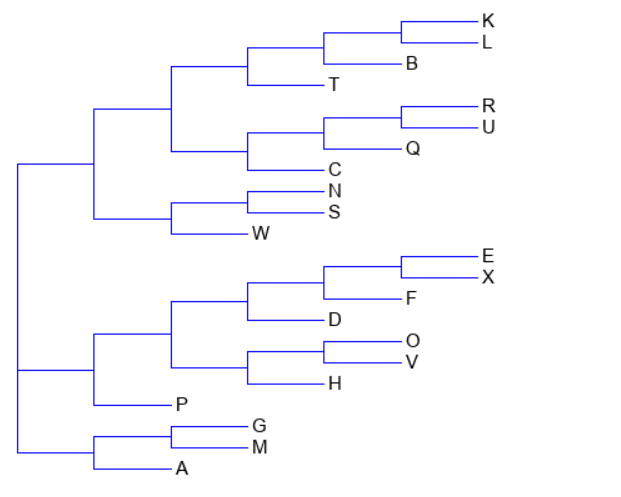